In [1]:
import pickle
import pickle
from helm.benchmark.hidden_geometry.geometry import Geometry, RunGeometry
from helm.benchmark.adaptation.scenario_state import ScenarioState
from helm.benchmark.scenarios.scenario import Instance
import os
import numpy as np
import plotly.express as px  # (version 4.7.0 or higher)
import pandas as pd


/u/dssc/zenocosini/miniconda3/envs/crfm-helm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# from datasets import Dataset, DatasetDict, load_dataset, load_from_disk
# from datasets import load_dataset

# dataset = load_dataset("cais/mmlu", "anatomy")
# for i in ['auxiliary_train', 'dev', 'validation', 'test']:
#     data = load_dataset("cais/mmlu", "anatomy", split=i)    
#     data.to_csv(f'/u/dssc/zenocosini/.cache/anatomy/{i}.csv')

In [2]:
path_version = "/u/dssc/zenocosini/helm_tests/benchmark_output/runs/v1"
path = "/mmlu:subject=anatomy,method=multiple_choice_joint,model=huggingface_gpt2,max_train_instances=3/"
path_intdim = os.path.join(path_version+path, "int_dim.pkl")

In [3]:
files = os.listdir(path_version)
files = list(filter(lambda x: x!= "eval_cache", files))
hidden_geometry = {}
hidden_states = {}
for k,i in enumerate(files):
    path_run = os.path.join(path_version, i)
    with open(path_run+"/hidden_geometry.pkl", "rb") as f:
        hidden_geometry[k] = pickle.load(f)

In [4]:
hidden_geometry[0].instances_id

83 overlapping datapoints found: keeping 66 unique elements WARNING: the order of points has been changed!
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
83 overlapping datapoints found: keeping 66 unique elements WARNING: the order of points has been changed!
layer.N=66layer.return_id_scaling_gride(range_max = 1000)=(array([8.21, 2.3 , 1.48, 1.2 , 1.07]), array([1.01, 0.2 , 0.09, 0.05, 0.03]), array([0.16, 0.23, 0.36, 0.62, 1.14]))
No identical identical points were found
layer.N=149layer.return_id_scaling_gride(range_max = 1000)=(array([11.45,  9.

/orfeo/cephfs/home/dssc/zenocosini/helm/src/helm/benchmark/hidden_geometry/utils.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return  np.asarray(id_per_layer)


No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
No identical identical points were found
layer.N=149layer.return_id_scaling_gride(range_max = 1000)=(array([21.12, 17.63, 15.39, 11.67,  6.52,  3.26]), array([1.73, 1.04, 0.65, 0.35, 0.14, 0.05]), array([0.51, 0.53, 0.56, 0.59, 0.65, 0.77]))
No identical identical points were found
layer.N=149layer.return_id_scaling_gride(range_max = 1000)=(array([17.86, 19.02, 17.2 , 14.76, 10.4 ,  5.44]), array([1.46, 1.12, 0.72, 0.44, 0.22, 0.08]), array([5.79, 6.08, 6.35, 6.6

{'last 2nn': array([[ 8.04],
        [11.88],
        [10.62],
        [11.8 ],
        [11.81],
        [12.64],
        [11.91],
        [14.63],
        [13.84],
        [12.  ],
        [14.6 ],
        [17.74],
        [10.44]]),
 'last gride': array([array([8.21, 2.3 , 1.48, 1.2 , 1.07]),
        array([11.45,  9.86,  7.96,  5.8 ,  3.62,  1.93]),
        array([10.66,  9.95,  8.54,  6.34,  4.15,  2.34]),
        array([11.92, 10.44,  8.84,  7.12,  4.72,  2.68]),
        array([11.82, 10.74,  9.4 ,  7.16,  4.75,  2.95]),
        array([12.7 , 11.22,  9.76,  7.43,  5.06,  2.95]),
        array([11.52, 10.3 ,  8.59,  7.58,  5.43,  3.07]),
        array([13.38, 10.61,  9.  ,  8.69,  5.8 ,  3.66]),
        array([12.37, 11.35,  8.8 ,  8.48,  6.46,  4.06]),
        array([11.06, 11.86, 10.12,  8.54,  6.82,  4.22]),
        array([12.29, 15.72, 14.32, 10.85,  9.48,  5.61]),
        array([14.97, 17.7 , 16.3 , 13.07, 10.96,  8.53]),
        array([10.05, 10.94,  7.3 ,  6.06,  4.46,  2.8 

In [6]:
int_dim = hidden_geometry[0].get_instances_id()
layers = np.arange(int_dim["last"].shape[0])
df = pd.DataFrame({'layers':layers, 'id':int_dim["last"][:,0]})
fig1 = px.line(df, x="layers", y="id", title='Intrinsic Dimension')

KeyError: 'last'

In [ ]:
int_dim["last"][:,0].shape

(13,)

In [ ]:
geom = Geometry([hidden_geometry])
overlap = geom._instances_overlap(run1=hidden_geometry[0], run2=hidden_geometry[1], method = "last", k=5)
fig3 = px.imshow(overlap)

In [ ]:
hidden_geometry[0].get_instances_id()


{'last': array([[20.26],
        [10.22],
        [ 8.9 ],
        [12.15],
        [11.36],
        [11.24],
        [11.61],
        [12.18],
        [12.  ],
        [14.43],
        [14.55],
        [13.64],
        [ 7.41]]),
 'sum': array([[21.21],
        [18.78],
        [21.55],
        [16.63],
        [17.34],
        [16.29],
        [14.51],
        [14.75],
        [13.52],
        [14.06],
        [14.1 ],
        [15.16],
        [ 7.69]])}

In [ ]:
geom = Geometry([hidden_geometry[0]])

In [ ]:
prova = geom._instances_overlap(run1=hidden_geometry[0], run2=hidden_geometry[0], method = "last", k=5)

<AxesSubplot: >

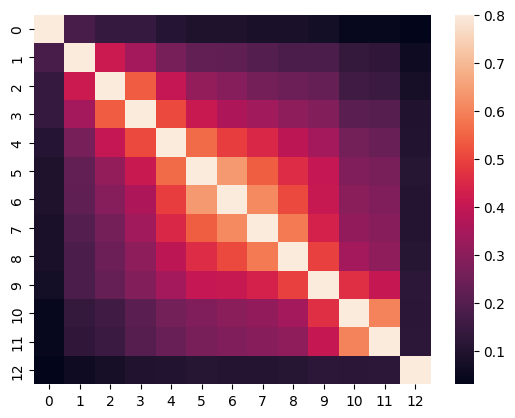

In [ ]:
import seaborn as sns
sns.heatmap(prova)